# IMPORT LIBRARIES

In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from scipy import stats
from sklearn.model_selection import train_test_split
from statistics import LinearRegression
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

# IMPORT DATASETS

In [262]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [263]:
train_df

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
0,0,120.0,24.0,6.9,0.314,7.1,0.498,48.0,510.0,23.20,240.0,90.4
1,1,140.0,41.0,11.0,0.150,6.5,0.950,19.0,300.0,8.50,190.0,130.0
2,2,160.0,51.0,9.0,0.450,9.1,2.500,12.0,370.0,25.00,230.0,160.0
3,3,46.0,13.0,2.9,0.120,2.7,0.430,6.4,110.0,5.00,97.0,41.0
4,4,240.0,147.0,70.0,0.600,48.0,6.800,93.0,1410.0,418.00,950.0,586.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6395,6395,180.0,58.0,40.0,0.180,25.0,3.600,22.0,540.0,48.00,400.0,219.0
6396,6396,44.0,5.7,3.0,0.120,3.7,0.470,5.9,100.0,0.85,56.0,30.0
6397,6397,138.0,40.3,28.4,0.100,14.2,8.600,31.0,438.0,17.70,300.0,159.0
6398,6398,210.0,110.0,190.0,0.230,47.0,7.900,120.0,1400.0,140.00,800.0,470.0


In [264]:
test_df.describe()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids
count,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000
mean,7200.000000,168.832299,55.668958,51.481462,0.349397,62.757297,3.423275,77.886431,659.276702,75.164221,409.850094
std,462.313206,82.953613,41.717342,77.520902,0.551632,1724.080876,4.968633,780.983717,620.275872,121.649147,271.134286
min,6400.000000,9.400000,0.260000,0.460000,0.000000,0.064000,0.004740,2.200000,66.000000,0.390000,29.000000
25%,6800.000000,110.000000,26.000000,12.000000,0.140000,7.800000,0.770000,21.000000,351.000000,13.100000,230.000000
50%,7200.000000,160.000000,46.200000,31.000000,0.210000,15.000000,2.000000,35.000000,530.000000,34.000000,330.000000
75%,7600.000000,210.000000,74.000000,63.000000,0.380000,25.000000,4.300000,61.000000,815.000000,94.600000,510.000000
max,8000.000000,700.000000,460.000000,1300.000000,9.900000,69000.000000,58.200000,27400.000000,17400.000000,2100.000000,2300.000000


# DATA PREP

In [265]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6400 non-null   int64  
 1   Alkalinity, total       6400 non-null   float64
 2   Calcium                 6400 non-null   float64
 3   Chloride                6400 non-null   float64
 4   Fluoride                6400 non-null   float64
 5   Magnesium               6400 non-null   float64
 6   Nitrate as N            6400 non-null   float64
 7   Sodium                  6400 non-null   float64
 8   Specific Conductivity   6400 non-null   float64
 9   Sulfate                 6400 non-null   float64
 10  Total Dissolved Solids  6400 non-null   float64
 11  Hardness                6400 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 600.1 KB


In [266]:
train_df.describe()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
count,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000
mean,3199.500000,167.151047,69.350432,53.213620,0.333625,23.446335,3.382707,62.437731,637.631953,71.645934,409.570669,216.148203
std,1847.665193,83.157803,1052.136452,92.934505,0.452473,325.389503,4.878279,556.891904,597.297274,108.414049,302.958442,161.431526
min,0.000000,12.000000,0.610000,0.580000,0.049000,0.051000,0.002300,1.300000,40.000000,0.140000,19.580000,2.500000
25%,1599.750000,110.000000,25.000000,11.000000,0.140000,7.300000,0.850000,21.000000,340.000000,13.000000,220.000000,101.000000
50%,3199.500000,153.500000,45.000000,28.000000,0.210000,14.000000,2.000000,35.000000,520.000000,33.000000,320.000000,180.000000
75%,4799.250000,209.000000,72.000000,62.000000,0.382250,25.000000,4.300000,60.000000,800.000000,85.000000,500.000000,281.000000
max,6399.000000,1000.000000,83000.000000,2100.000000,9.000000,26000.000000,106.000000,32000.000000,31400.000000,2000.000000,4100.000000,1901.000000


## Drop Unuse Feature

In [267]:
train_df = train_df.drop(columns=['id'])

## Handle Null Values

In [268]:
train_df.isnull().sum()

Alkalinity, total         0
Calcium                   0
Chloride                  0
Fluoride                  0
Magnesium                 0
Nitrate as N              0
Sodium                    0
Specific Conductivity     0
Sulfate                   0
Total Dissolved Solids    0
Hardness                  0
dtype: int64

## Handle Outlier

In [269]:
def percentage_outliers_iqr(df):
    outliers_percentage = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        total = len(df[column])
        percentage = (outliers / total) * 100
        outliers_percentage[column] = percentage
    return outliers_percentage


In [270]:
outliers_percentage = percentage_outliers_iqr(train_df)

In [271]:
def removeOutlier(df, col):
    kuartil1 = col.quantile(0.25)
    kuartil3 = col.quantile(0.75)
    IQR = kuartil3 - kuartil1
    lower_bound = kuartil1 - 1.5 * IQR
    upper_bound = kuartil3 + 1.5 * IQR
    df = df[(col >= lower_bound) & (col <= upper_bound)]
    return df

In [272]:
clean_train_df = train_df.copy()

outliers_percentage = percentage_outliers_iqr(clean_train_df)

for col in clean_train_df.columns:
    if col != "id" and clean_train_df[col].dtypes != object:
        if outliers_percentage[col] > 5:
            clean_train_df[col] = np.log1p(clean_train_df[col])
        else:
            clean_train_df = removeOutlier(clean_train_df, clean_train_df[col])
        

In [273]:
clean_train_df

,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
0,120.0,24.0,2.066863,0.273076,2.091864,0.404131,3.891820,510.0,3.186353,5.484797,90.4
1,140.0,41.0,2.484907,0.139762,2.014903,0.667829,2.995732,300.0,2.251292,5.252273,130.0
2,160.0,51.0,2.302585,0.371564,2.312535,1.252763,2.564949,370.0,3.258097,5.442418,160.0
3,46.0,13.0,1.360977,0.113329,1.308333,0.357674,2.001480,110.0,1.791759,4.584967,41.0
5,154.0,49.2,3.951244,0.223144,2.451005,0.438255,3.964615,619.0,4.615121,5.826000,198.0
...,...,...,...,...,...,...,...,...,...,...,...
6393,115.0,27.9,2.766319,0.095310,2.322388,1.360977,3.091042,292.0,1.629241,5.384495,113.0
6395,180.0,58.0,3.713572,0.165514,3.258097,1.526056,3.135494,540.0,3.891820,5.993961,219.0
6396,44.0,5.7,1.386294,0.113329,1.547563,0.385262,1.931521,100.0,0.615186,4.043051,30.0
6397,138.0,40.3,3.380995,0.095310,2.721295,2.261763,3.465736,438.0,2.928524,5.707110,159.0


In [274]:
clean_train_df.describe()

,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
count,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000
mean,154.255494,46.671512,3.201088,0.253165,2.529553,1.156416,3.511040,531.407192,3.352391,5.717488,181.621282
std,64.660236,28.259291,1.015936,0.196209,0.812991,0.669267,0.692113,266.130708,1.140360,0.496596,105.101574
min,21.000000,1.000000,0.457425,0.047837,0.049742,0.002297,0.832909,40.000000,0.131028,3.024320,3.500000
25%,110.000000,24.000000,2.397895,0.122218,2.054124,0.604316,3.044522,320.000000,2.553321,5.353040,99.000000
50%,150.000000,41.200000,3.218876,0.182322,2.639057,1.098612,3.496508,480.000000,3.367296,5.707110,160.000000
75%,190.000000,65.000000,3.970292,0.314811,3.091042,1.620376,3.970292,690.000000,4.219508,6.066108,250.000000
max,355.000000,140.000000,6.523562,2.302585,10.165890,4.044804,10.373522,1350.000000,6.311735,7.741099,487.000000


# FEATURE ENGINEERING

## LABEL CORRELATION

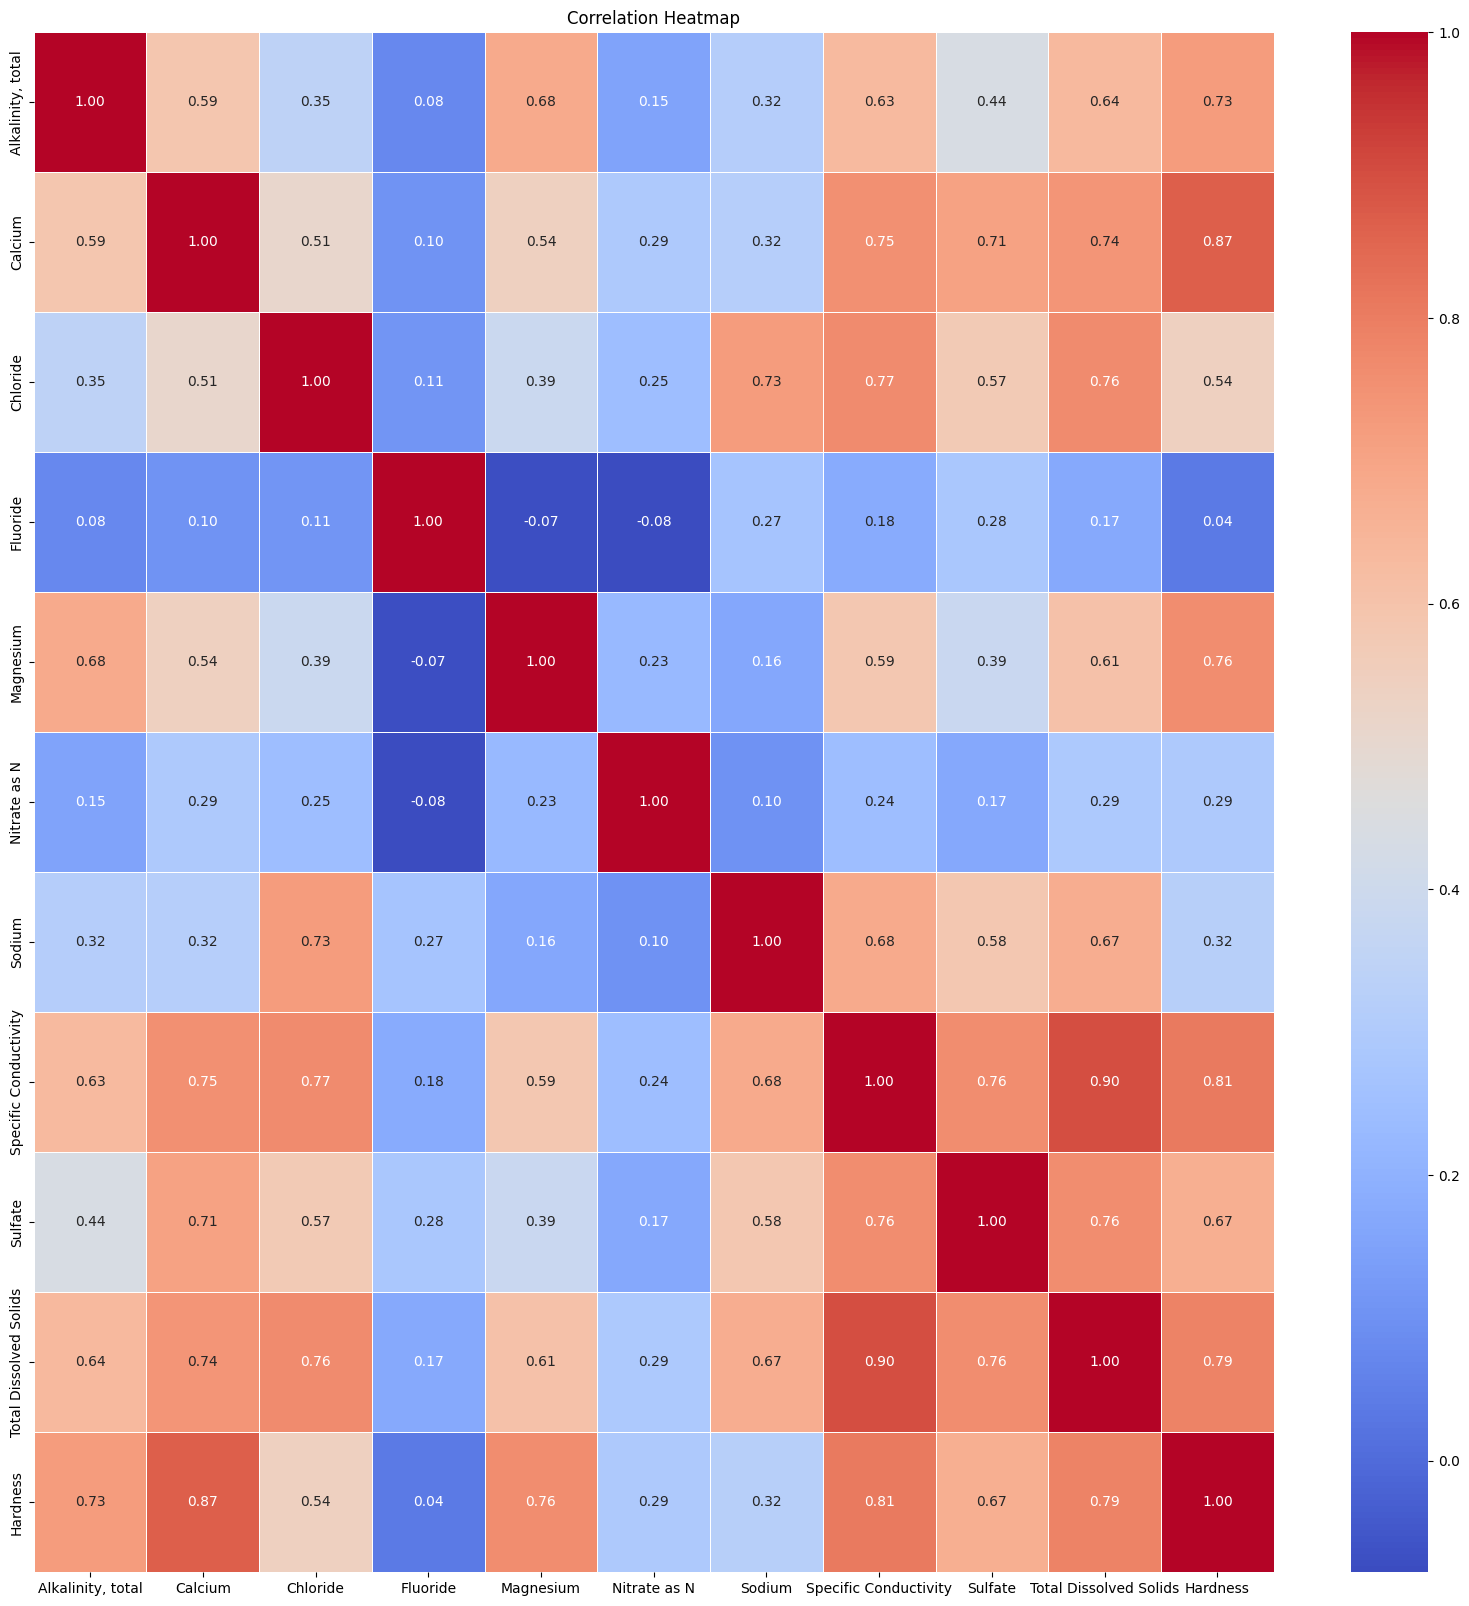

In [275]:
# Calculate the correlation matrix
correlation_matrix = clean_train_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# MODEL CREATION

## Split Feature

In [276]:
X = clean_train_df.drop(columns=['Hardness'])
y = clean_train_df['Hardness']

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

In [277]:
y.describe()

count    5770.000000
mean      181.621282
std       105.101574
min         3.500000
25%        99.000000
50%       160.000000
75%       250.000000
max       487.000000
Name: Hardness, dtype: float64

## Linear Regression

In [278]:
# Scale the features
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_val_scaled = scaler.transform(X_val)

# Train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_train)
y_val_pred = linear_reg.predict(X_val)

In [279]:
from sklearn.metrics import r2_score

r2 = r2_score(y_train, y_pred)
print(r2)

0.905168281694155


## Random Forest

In [280]:
best_params = {'n_estimators': 76, 'max_depth': 32, 'min_samples_split': 2, 'min_samples_leaf': 1} 

In [281]:
from sklearn.ensemble import RandomForestRegressor


best_params['random_state'] = 42
random_forest = RandomForestRegressor(**best_params)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_train)

In [282]:
r2 = r2_score(y_train, y_pred)
print(r2)

0.9887419793580449


## KNN

In [283]:
from sklearn import neighbors

rmse_val = [] 
for K in range(20):
    K = K+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_val) 
    r2 = r2_score(y_val, y_pred)
    print(f"K = {K} dengan r2 = {r2}")

K = 1 dengan r2 = 0.7176738702710513
K = 2 dengan r2 = 0.771838112350349
K = 3 dengan r2 = 0.7863168928801576
K = 4 dengan r2 = 0.7952615415160968
K = 5 dengan r2 = 0.8047929853211495
K = 6 dengan r2 = 0.8069479324555688
K = 7 dengan r2 = 0.805172014517862
K = 8 dengan r2 = 0.8059968337157756
K = 9 dengan r2 = 0.8081854869713668
K = 10 dengan r2 = 0.8079826278965074
K = 11 dengan r2 = 0.8101157261802308
K = 12 dengan r2 = 0.8071420720688139
K = 13 dengan r2 = 0.806072178235691
K = 14 dengan r2 = 0.8040515669506954
K = 15 dengan r2 = 0.8034819879789646
K = 16 dengan r2 = 0.8015956931678901
K = 17 dengan r2 = 0.7999854534611768
K = 18 dengan r2 = 0.7979142736898345
K = 19 dengan r2 = 0.7960553690439729
K = 20 dengan r2 = 0.7946482437253547


In [284]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 11)

knn.fit(X_train, y_train) 
y_pred = knn.predict(X_val) 
r2 = r2_score(y_val, y_pred)

## STACK: RF, KNN

In [285]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV


estimators = [('Random Forest', random_forest),
              ('KNN', knn)]

stacking_regressor_rf_knn = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())

In [286]:
stacking_regressor_rf_knn.fit(X_train, y_train) 
y_pred = stacking_regressor_rf_knn.predict(X_val) 
r2 = r2_score(y_val, y_pred)
print(r2)

0.9151533087462607


## STACK: KNN, RF

In [287]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV


estimators = [('KNN', knn),
              ('Random Forest', random_forest)]

stacking_regressor_knn_rf = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())

In [288]:
stacking_regressor_knn_rf.fit(X_train, y_train) 
y_pred = stacking_regressor_knn_rf.predict(X_val) 
r2 = r2_score(y_val, y_pred)
print(r2)

0.9151533086518296


In [289]:
cv_scores = cross_val_score(stacking_regressor_knn_rf, X_val, y_val, cv=5, scoring='r2')

print("Cross-validation scores:", cv_scores)
print("Average score", cv_scores.mean())

Cross-validation scores: [0.89988424 0.9334677  0.82356577 0.93782178 0.90663106]
Average score 0.9002741100034319


## XGB

In [314]:
import xgboost as xgb

xgb_r = xgb.XGBRegressor(n_estimators=25, 
                         objective="reg:squarederror", 
                         eval_metric="rmse",
                         learning_rate=0.2, 
                         random_state=0)

xgb_r.fit(X_train, y_train,
          verbose=5)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=25, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [315]:
y_pred = xgb_r.predict(X_val) 
r2 = r2_score(y_val, y_pred)
print(r2)

0.9135337801179148


## STACK: RF, XGBR

In [292]:
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

xgb = XGBRegressor()
rf = RandomForestRegressor()

stacking_regressor_rf_xgb = StackingCVRegressor(regressors=(rf, xgb),
                            meta_regressor=xgb, cv=5,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stacking_regressor_rf_xgb.fit(X_train, y_train)

StackingCVRegressor(meta_regressor=XGBRegressor(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                device=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=None,
                                                grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learning_rate...
                                             learning_rate=None, max_bin=None,
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None,
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             multi_strategy=None,
                                             n_estimators=None, n_jobs=None,
                                             num_parallel_tree=None,
                                             random_state=None, ...)),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [293]:
stacking_regressor_xgb_rf = StackingCVRegressor(regressors=(xgb, rf),
                            meta_regressor=rf, cv=5,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stacking_regressor_xgb_rf.fit(X_train, y_train)

StackingCVRegressor(meta_regressor=RandomForestRegressor(), random_state=42,
                    regressors=(XGBRegressor(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=None, device=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=None,
                                             grow_policy=None,
                                             importance_...
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None,
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             multi_strategy=None,
                                             n_estimators=None, n_jobs=None,
                                             num_parallel_tree=None,
                                             random_state=None, ...),
                                RandomForestRegressor()),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [294]:
y_pred = stacking_regressor_rf_xgb.predict(X_val) 
r2 = r2_score(y_val, y_pred)
print(r2)

0.9077929360022834


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [295]:
y_pred = stacking_regressor_xgb_rf.predict(X_val) 
r2 = r2_score(y_val, y_pred)
print(r2)

0.9096130116274721


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [311]:
cv_scores = cross_val_score(stacking_regressor_rf_xgb, X_val, y_val, cv=5, scoring='r2')

print("Cross-validation scores:", cv_scores)
print("Average score", cv_scores.mean())

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Cross-validation scores: [0.87916137 0.91567116 0.80912287 0.92498783 0.90096107]
Average score 0.8859808600654592


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [312]:
cv_scores = cross_val_score(stacking_regressor_xgb_rf, X_val, y_val, cv=5, scoring='r2')

print("Cross-validation scores:", cv_scores)
print("Average score", cv_scores.mean())

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Cross-validation scores: [0.89314005 0.92986382 0.81837202 0.93533051 0.90407967]
Average score 0.8961572170912777


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


## Neural Network

In [297]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adadelta, Adagrad, Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import optuna

In [298]:
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasRegressor

random_state = 42
np.random.seed(random_state)
tf.random.set_seed(random_state)
random.seed(random_state)

In [299]:
# import numpy as np
# import optuna
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_absolute_error
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.optimizers import Adadelta, Adagrad, Adam, RMSprop, SGD
# from tensorflow.keras.callbacks import EarlyStopping

# # Define R² metric function
# def r2_score(y_true, y_pred):
#     SS_res = np.sum((y_true - y_pred) ** 2)
#     SS_tot = np.sum((y_true - np.mean(y_true)) ** 2)
#     return 1 - SS_res / (SS_tot + np.finfo(float).eps)

# # Assuming X_train and y_train are defined and loaded
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)

# def objective_neural_network(trial):
#     layer_1 = trial.suggest_int("layer_1", 2, 8)
#     layer_2 = trial.suggest_int("layer_2", 2, 8)
#     layer_3 = trial.suggest_int("layer_3", 2, 8)
#     learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
#     dropout_rate = trial.suggest_float("dropout_rate", 0.0, 0.5)
#     epoch = trial.suggest_int("epoch", 10, 50)
#     batch_size = trial.suggest_int("batch_size", 1, 100)
#     optimizer_name = trial.suggest_categorical("optimizer", ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD'])

#     optimizer_map = {
#         'Adadelta': Adadelta(learning_rate=learning_rate),
#         'Adagrad': Adagrad(learning_rate=learning_rate),
#         'Adam': Adam(learning_rate=learning_rate),
#         'RMSprop': RMSprop(learning_rate=learning_rate),
#         'SGD': SGD(learning_rate=learning_rate)
#     }

#     optimizer = optimizer_map[optimizer_name]

#     neural_network = Sequential()
#     neural_network.add(Dense(layer_1, input_shape=(X_train_scaled.shape[1],), activation='relu'))
#     neural_network.add(Dropout(dropout_rate))
#     neural_network.add(Dense(layer_2, activation='relu'))
#     neural_network.add(Dropout(dropout_rate))
#     neural_network.add(Dense(layer_3, activation='relu'))
#     neural_network.add(Dropout(dropout_rate))
#     neural_network.add(Dense(1, activation='linear'))  # Use 'linear' activation for regression

#     neural_network.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error'])

#     early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#     neural_network.fit(X_train_scaled, y_train, epochs=epoch, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping], verbose=0)

#     y_pred = neural_network.predict(X_train_scaled).flatten()  # Ensure y_pred is 1-dimensional
#     r2 = r2_score(y_train, y_pred)
    
#     return r2

# study = optuna.create_study(direction='maximize')
# study.optimize(objective_neural_network, n_trials=10)

# print("Best value (R²):", study.best_value)
# print("Best parameters:", study.best_params)


In [300]:
# import numpy as np
# import optuna
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_absolute_error
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.optimizers import Adadelta, Adagrad, Adam, RMSprop, SGD
# from tensorflow.keras.callbacks import EarlyStopping
# from scikeras.wrappers import KerasRegressor
# from sklearn.model_selection import cross_val_score

# # Define R² metric function
# def r2_score(y_true, y_pred):
#     SS_res = np.sum((y_true - y_pred) ** 2)
#     SS_tot = np.sum((y_true - np.mean(y_true)) ** 2)
#     return 1 - SS_res / (SS_tot + np.finfo(float).eps)

# # Assuming X_train and y_train are defined and loaded
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)

# def objective_neural_network(trial):
#     layer_1 = trial.suggest_int("layer_1", 2, 8)
#     layer_2 = trial.suggest_int("layer_2", 2, 8)
#     layer_3 = trial.suggest_int("layer_3", 2, 8)
#     learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
#     dropout_rate = trial.suggest_float("dropout_rate", 0.0, 0.5)
#     epoch = trial.suggest_int("epoch", 10, 50)
#     batch_size = trial.suggest_int("batch_size", 1, 100)
#     optimizer_name = trial.suggest_categorical("optimizer", ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD'])

#     optimizer_map = {
#         'Adadelta': Adadelta(learning_rate=learning_rate),
#         'Adagrad': Adagrad(learning_rate=learning_rate),
#         'Adam': Adam(learning_rate=learning_rate),
#         'RMSprop': RMSprop(learning_rate=learning_rate),
#         'SGD': SGD(learning_rate=learning_rate)
#     }

#     def create_model_opt():
#         optimizer = optimizer_map[optimizer_name]

#         neural_network = Sequential()
#         neural_network.add(Dense(layer_1, input_shape=(X_train_scaled.shape[1],), activation='relu'))
#         neural_network.add(Dropout(dropout_rate))
#         neural_network.add(Dense(layer_2, activation='relu'))
#         neural_network.add(Dropout(dropout_rate))
#         neural_network.add(Dense(layer_3, activation='relu'))
#         neural_network.add(Dropout(dropout_rate))
#         neural_network.add(Dense(1, activation='linear'))  # Use 'linear' activation for regression

#         neural_network.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error'])
#         return neural_network

#     # Create KerasRegressor
#     neural_network = KerasRegressor(build_fn=create_model_opt, epochs=epoch, batch_size=batch_size, verbose=0)

#     # Perform cross-validation
#     cv_scores = cross_val_score(neural_network, X_train_scaled, y_train, cv=3, scoring='r2')

#     print("Cross-validation scores:", cv_scores)
#     print("Average score", cv_scores.mean())
    
#     return cv_scores.mean()

# study = optuna.create_study(direction='maximize')
# study.optimize(objective_neural_network, n_trials=20)

# print("Best value (cv R²):", study.best_value)
# print("Best parameters:", study.best_params)


In [301]:
random_state = 42
np.random.seed(random_state)
tf.random.set_seed(random_state)
random.seed(random_state)

# Define R² metric function using TensorFlow
def tf_r2_score(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res / (SS_tot + tf.keras.backend.epsilon())

# Assuming X_train and y_train are defined and loaded
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Best parameters from Optuna
params = {
    'layer_1': 7,
    'layer_2': 2,
    'layer_3': 5,
    'learning_rate': 0.018708417846516115,
    'dropout_rate': 0.0022822336772516688,
    'epoch': 75,
    'batch_size': 10,
    'optimizer': 'Adam'
}

def create_model():
    # Optimizer
    optimizer = Adam(learning_rate=params['learning_rate'])
    # Define the neural network model
    neural_network = Sequential()
    neural_network.add(Dense(params['layer_1'], input_shape=(X_train_scaled.shape[1],), activation='relu'))
    neural_network.add(Dropout(params['dropout_rate']))
    neural_network.add(Dense(params['layer_2'], activation='relu'))
    neural_network.add(Dropout(params['dropout_rate']))
    neural_network.add(Dense(params['layer_3'], activation='relu'))
    neural_network.add(Dropout(params['dropout_rate']))
    neural_network.add(Dense(1, activation='linear'))  # Use 'linear' activation for regression

    neural_network.compile(loss='mean_squared_error', optimizer=optimizer, metrics=[tf_r2_score])
    return neural_network

neural_network = KerasRegressor(model=create_model, epochs=48, batch_size=13, verbose=0)

# Early stopping
early_stopping = EarlyStopping(monitor='val_tf_r2_score', patience=5, restore_best_weights=True)

# Train the model
neural_network.fit(X_train_scaled, y_train, epochs=params['epoch'], batch_size=params['batch_size'], validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Predict and evaluate
y_pred = neural_network.predict(X_train_scaled).flatten()  # Ensure y_pred is 1-dimensional
r2 = tf_r2_score(tf.convert_to_tensor(y_train, dtype=tf.float32), tf.convert_to_tensor(y_pred, dtype=tf.float32))

print("R² on training data:", r2.numpy())


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/75
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 17716.1191 - tf_r2_score: -30.9915 - val_loss: 1054.4352 - val_tf_r2_score: -17.4572
Epoch 2/75
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 1194.2499 - tf_r2_score: -18.8713 - val_loss: 984.1458 - val_tf_r2_score: -17.7008
Epoch 3/75
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1398.1974 - tf_r2_score: -18.8571 - val_loss: 963.4952 - val_tf_r2_score: -17.8393
Epoch 4/75
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 1094.0454 - tf_r2_score: -18.6995 - val_loss: 957.7441 - val_tf_r2_score: -17.8853
Epoch 5/75
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 1150.1764 - tf_r2_score: -18.7010 - val_loss: 939.5707 - val_tf_r2_score: -17.9886
Epoch 6/75
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 1062.8849 - tf_r2_score: -18.6846 - val_loss: 954.7574 - val_tf_r2_score: -17.6394
Epoch 7/75
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 1074.7080 - tf_r2_score: -18.6606 - val_loss: 950.0909 - val_tf_r2_sco

In [302]:
random_state = 42
np.random.seed(random_state)
tf.random.set_seed(random_state)
random.seed(random_state)

cv_scores = cross_val_score(neural_network, X_val, y_val, cv=5, scoring='r2')

print("Cross-validation scores:", cv_scores)
print("Average score", cv_scores.mean())

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in th

Cross-validation scores: [0.84098557 0.89894161 0.83254968 0.91486871 0.87549188]
Average score 0.8725674908909422


## SVR

In [303]:
from sklearn.svm import SVR

svr = SVR()

svr.fit(X_train, y_train)

SVR()

In [304]:
cv_scores = cross_val_score(svr, X_val, y_val, cv=5, scoring='r2')

print("Cross-validation scores:", cv_scores)
print("Average score", cv_scores.mean())

Cross-validation scores: [0.60116701 0.5885273  0.58563944 0.62034194 0.59424895]
Average score 0.5979849277316941


In [305]:
from sklearn.ensemble import BaggingRegressor

bag_svr = BaggingRegressor(estimator=svr, n_estimators=10, random_state=42)

bag_svr.fit(X_train, y_train)

# Predict with bagged
y_predtrain_bag_svr = bag_svr.predict(X_train)
y_predval_bag_svr = bag_svr.predict(X_val)
r2train_bag_svr = r2_score(y_train, y_predtrain_bag_svr)
r2val_bag_svr = r2_score(y_val, y_predval_bag_svr)
print(f"bag_svr r2 train =  {r2train_bag_svr}, bag_svr r2 val = {r2val_bag_svr}, bag_svr r2 diff = {r2train_bag_svr-r2val_bag_svr}")

bag_svr r2 train =  0.73558629492552, bag_svr r2 val = 0.6975513000875895, bag_svr r2 diff = 0.03803499483793049


In [322]:
from sklearn.ensemble import BaggingRegressor

bag_xgbr = BaggingRegressor(estimator=xgb_r, n_estimators=10, random_state=42)

bag_xgbr.fit(X_train, y_train)

# Predict with bagged
y_predtrain_bag_xgbr = bag_xgbr.predict(X_train)
y_predval_bag_xgbr = bag_xgbr.predict(X_val)
r2train_bag_xgbr = r2_score(y_train, y_predtrain_bag_xgbr)
r2val_bag_xgbr = r2_score(y_val, y_predval_bag_xgbr)
print(f"bag_xgbr r2 train =  {r2train_bag_xgbr}, bag_xgbr r2 val = {r2val_bag_xgbr}, bag_xgbr r2 diff = {r2train_bag_xgbr-r2val_bag_xgbr}")

bag_xgbr r2 train =  0.9639748249851564, bag_xgbr r2 val = 0.9199405053732697, bag_xgbr r2 diff = 0.04403431961188675


In [331]:
from sklearn.ensemble import BaggingRegressor

bag_rf = BaggingRegressor(estimator=random_forest, n_estimators=10, random_state=42)

bag_rf.fit(X_train, y_train)

# Predict with bagged
y_predtrain_bag_rf = bag_rf.predict(X_train)
y_predval_bag_rf = bag_rf.predict(X_val)
r2train_bag_rf = r2_score(y_train, y_predtrain_bag_rf)
r2val_bag_rf = r2_score(y_val, y_predval_bag_rf)
print(f"bag_rf r2 train =  {r2train_bag_rf}, bag_rf r2 val = {r2val_bag_rf}, bag_rf r2 diff = {r2train_bag_rf-r2val_bag_rf}")

bag_rf r2 train =  0.971149889545006, bag_rf r2 val = 0.9198142699187996, bag_rf r2 diff = 0.051335619626206475


In [334]:
from sklearn.ensemble import BaggingRegressor

bag_knn = BaggingRegressor(estimator=knn, n_estimators=10, random_state=42)

bag_knn.fit(X_train, y_train)

# Predict with bagged
y_predtrain_bag_knn = bag_knn.predict(X_train)
y_predval_bag_knn = bag_knn.predict(X_val)
r2train_bag_knn = r2_score(y_train, y_predtrain_bag_knn)
r2val_bag_knn = r2_score(y_val, y_predval_bag_knn)
print(f"bag_knn r2 train =  {r2train_bag_knn}, bag_knn r2 val = {r2val_bag_knn}, bag_knn r2 diff = {r2train_bag_knn-r2val_bag_knn}")

bag_knn r2 train =  0.8575541774562141, bag_knn r2 val = 0.8042602631269491, bag_knn r2 diff = 0.053293914329265


In [339]:
from mlxtend.regressor import StackingCVRegressor

stack_bagall_rf_knn_xgbr_rf = StackingCVRegressor(regressors=(bag_rf, bag_knn, bag_xgbr),
                            meta_regressor=bag_rf, cv=5,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack_bagall_rf_knn_xgbr_rf.fit(X_train, y_train)

StackingCVRegressor(meta_regressor=BaggingRegressor(estimator=RandomForestRegressor(max_depth=32,
                                                                                    n_estimators=76,
                                                                                    random_state=42),
                                                    random_state=42),
                    random_state=42,
                    regressors=(BaggingRegressor(estimator=RandomForestRegressor(max_depth=32,
                                                                                 n_estimators=76,
                                                                                 random_state=42),
                                                 random_state=42),
                                BaggingRegressor(estimator=KNeighborsRegressor(n_neighbors=11),...
                                                                        max_bin=None,
                                                                        max_cat_threshold=None,
                                                                        max_cat_to_onehot=None,
                                                                        max_delta_step=None,
                                                                        max_depth=None,
                                                                        max_leaves=None,
                                                                        min_child_weight=None,
                                                                        missing=nan,
                                                                        monotone_constraints=None,
                                                                        multi_strategy=None,
                                                                        n_estimators=25,
                                                                        n_jobs=None,
                                                                        num_parallel_tree=None,
                                                                        random_state=0, ...),
                                                 random_state=42)),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [340]:
cv_scores = cross_val_score(stack_bagall_rf_knn_xgbr_rf, X_val, y_val, cv=5, scoring='r2')

print("Cross-validation scores:", cv_scores)
print("Average score", cv_scores.mean())

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
c:\Users\A

Cross-validation scores: [0.89445606 0.93012453 0.81433377 0.9398664  0.91831443]
Average score 0.8994190382018179


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(


# SUBMISSION

In [341]:
test_pred = stack_bagall_rf_knn_xgbr_rf.predict(test_df.drop(columns=["id"]))

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(


In [342]:
submission_df = pd.DataFrame(test_df["id"])
submission_df["Hardness"] = test_pred


In [343]:
from datetime import datetime

predicting_model = "stack_bagall_rf_knn_xgbr_rf"
submission_df.to_csv(("submission-" + predicting_model + datetime.now().strftime("-%Y %m %d_%Hh %Mm %Ss") + ".csv") , index=False)